In [1]:
# !pip install dagshub

In [2]:
from pycaret.datasets import get_data
data = get_data('diamond')

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171


In [3]:
import mlflow

In [4]:
# mlflow.set_tracking_uri("http://192.168.7.95:8000/")

In [5]:
from pycaret.regression import *
s = setup(data,target='Price',transform_target=True,
         log_experiment="dagshub",
         log_plots=True,
         experiment_name = 'diamond',
         )

,Description,Value
0,Session id,7022
1,Target,Price
2,Target type,Regression
3,Original data shape,"(6000, 8)"
4,Transformed data shape,"(6000, 29)"
5,Transformed train set shape,"(4200, 29)"
6,Transformed test set shape,"(1800, 29)"
7,Ordinal features,1
8,Numeric features,1
9,Categorical features,6


❗❗❗ AUTHORIZATION REQUIRED ❗❗❗

Output()



Open the following link in your browser to authorize the client:
https://dagshub.com/login/oauth/authorize?state=9768cebb-a5dd-4f13-a3f4-2ddc14cf6beb&client_id=32b60ba385aa7cecf24046d8195a71c07dd345d9657977863b52e7748e0f0f28&middleman_request_id=b3789c4119c031031d7fa6e8448822e9a8b7cb565a1bf09216885621f73adb52




Please insert your repository owner_name/repo_name: vimalpillai21/my-first-repo


Repository initialized!

2023/09/06 12:39:17 INFO mlflow.tracking.fluent: Experiment with name 'diamond' does not exist. Creating a new experiment.


In [6]:
best = compare_models(exclude=['ransac','lightgbm'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
xgboost,Extreme Gradient Boosting,626.9206,1598966.7594,1254.7593,0.9841,0.0651,0.0485,0.0950
gbr,Gradient Boosting Regressor,751.8941,2327263.0965,1494.5888,0.9778,0.0764,0.0571,0.1040
rf,Random Forest Regressor,740.1175,2450952.1178,1527.0642,0.9766,0.0781,0.0573,0.1760
et,Extra Trees Regressor,761.4085,2632818.9878,1596.1906,0.9745,0.0801,0.0592,0.1970
dt,Decision Tree Regressor,987.3636,4342811.9600,2063.2063,0.9580,0.1050,0.0763,0.0590
ada,AdaBoost Regressor,2051.3525,17167254.9725,4099.0988,0.8349,0.1923,0.1547,0.0960
knn,K Neighbors Regressor,3110.0423,36917497.8732,6053.5764,0.6380,0.3693,0.2362,0.0590
omp,Orthogonal Matching Pursuit,3324.3177,76432384.2366,8566.0721,0.2502,0.2821,0.2222,0.0580
lasso,Lasso Regression,6602.1165,115102565.6242,10707.6745,-0.1268,0.7154,0.5666,0.0570
en,Elastic Net,6602.1165,115102565.6242,10707.6745,-0.1268,0.7154,0.5666,0.0570


Processing:   0%|          | 0/73 [00:00<?, ?it/s]

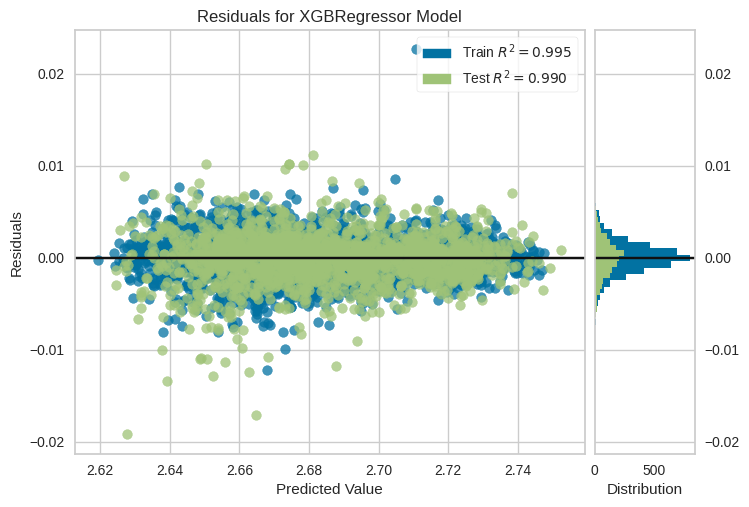

In [7]:
# check the residuals of trained model
plot_model(best, plot = 'residuals')

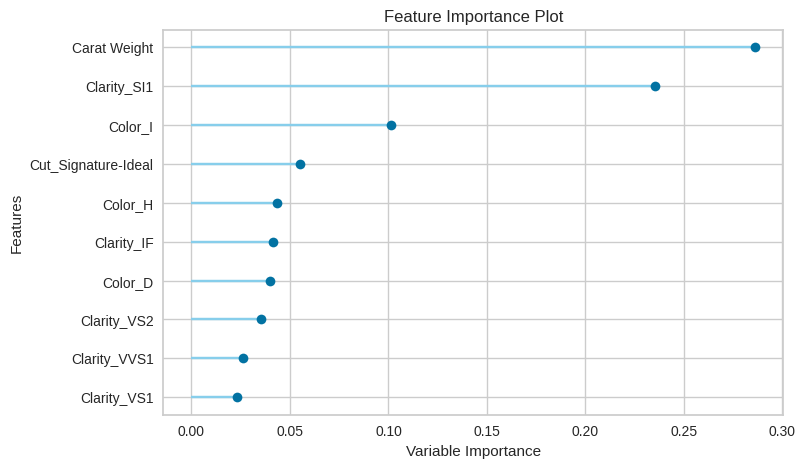

In [8]:
# check feature importance
plot_model(best, plot = 'feature')

In [9]:
# finalize the model
final_best = finalize_model(best)

# save model to disk
save_model(final_best, 'diamond-pipeline')

Transformation Pipeline and Model Successfully Saved


Uploading to a new branch main, splitting it off from the default branch main

Uploading files (1) to "vimalpillai21/my-first-repo"...

Upload finished successfully!

(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('target_transformation',
                  TransformerWrapperWithInverse(transformer=TargetTransformer(estimator=PowerTransformer(standardize=False)))),
                 ('numerical_imputer',
                  TransformerWrapper(include=['Carat Weight'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['Cut', 'Color', '...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=n